# Module 6.1 — Path vs Endpoint Illusion

### Core Objective
Understand how sampling frequency changes the *appearance* of the same probabilistic process.

This notebook demonstrates how:
- Daily measurement
- Weekly aggregation
- Monthly aggregation

…can produce very different perceived stability, even when derived from the exact same underlying return stream.

Important:
- No trading system
- No optimization
- No strategy logic
- No improvement logic

This is a pure probabilistic simulation.

We will examine:
1. Smoothness differences
2. Stability perception
3. Information loss due to aggregation
4. The difference between lived path and endpoint summary

# Bernoulli vs Gaussian — Structural Comparison

| Category | Bernoulli Model (Discrete) | Gaussian Model (Continuous) |
|-----------|----------------------------|------------------------------|
| **Random Sequence Generation** | `seq = np.where(np.random.rand(n_trades) < p, win_R, loss_R)` | `seq = np.random.normal(mu, sigma, n_trades)`|
| **What Each Element Represents** | Outcome of one trade | Return of one period/trade |
| **Outcome Type** | Discrete (two possible values) | Continuous (infinite possible values) |
| **Distribution Shape** | Two-point distribution | Normal distribution (symmetric, if assumed normal) |
| **Primary Parameters** | `p`, `win_R`, `loss_R` | `mu`, `sigma` |
| **Edge Definition** | `p * win_R - (1 - p) * loss_R` | `mu` |
| **How Edge Is Introduced** | Emerges from win probability and payoff structure | Directly encoded as the mean of the distribution |
| **Example Sequence** | `[1, -1, -1, 1, 1]` | `[0.0056, -0.0047, 0.0068]` |
| **Magnitude of Outcomes** | Fixed | Variable |
| **Equity Construction** | `equity = initial_equity + np.cumsum(seq)` | `equity = initial_equity * np.cumprod(1 + seq)` |
| **Compounding Structure** | Additive | Multiplicative |
| **Randomness Representation** | Binary uncertainty | Distributional uncertainty |
| **IID(Independent and Identically Distributed) Assumption Effect** | Probability resets each trial | Distribution resets each period |
| **Zero Edge Condition** | `p = 0.5` (symmetric payoff) | `mu = 0` |
| **Behavior When Edge = 0** | Random walk (additive) | Random walk with volatility drag (multiplicative) |
| **Level of Abstraction** | Outcome-driven model | Distribution-driven model |
| **Generality** | Specific discrete case | More general stochastic framework |

---

## Conceptual Evolution

Bernoulli → models outcome structure first.  
Gaussian → models distribution structure first.

Bernoulli defines *events*.  
Gaussian defines *statistical properties of events*.

Both generate stochastic paths.  
They differ in how uncertainty is encoded.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Simulation Parameters

In [18]:
#np.random.seed(42)

n = 1000                 # number of daily observations
mu = 0.001               # positive drift
sigma = 0.02             # daily volatility
initial_equity = 1.0

## Generate Daily Returns

In [19]:
daily_returns = np.random.normal(mu, sigma, n)
daily_df = pd.DataFrame({
    'daily_returns': daily_returns
})

## Construct Daily Equity Curve

In [20]:
equity = initial_equity * np.cumprod(1 + daily_returns)
daily_df['daily_equity'] = equity

## Aggegrate to weekly returns (5-day blocks)

In [21]:
weekly_returns = (
    daily_df["daily_returns"]
    .groupby(np.arange(len(daily_df)) // 5)
    .sum()
)

weekly_equity = initial_equity * np.cumprod(1 + weekly_returns)

## Aggregate to Monthly Returns (21-day blocks)

In [22]:
monthly_returns = (
    daily_df['daily_returns']
    .groupby(np.arange(len(daily_df)) // 21)
    .sum()
)

monthly_equity = initial_equity * np.cumprod(1 + monthly_returns)

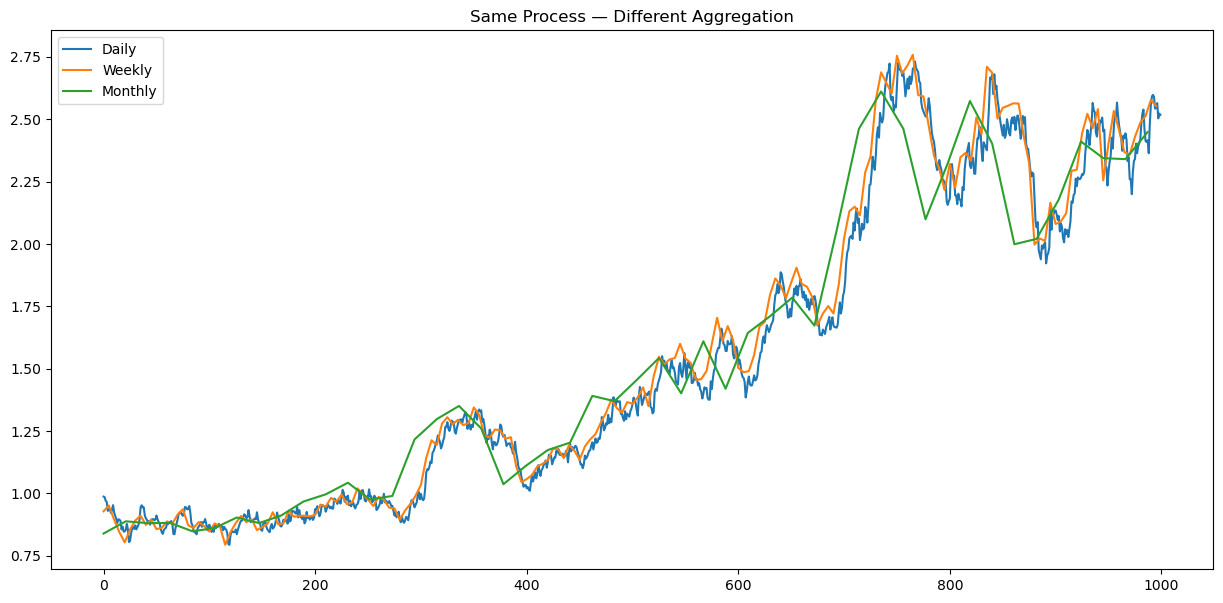

In [23]:
plt.figure(figsize = (15, 7))

plt.plot(daily_df["daily_equity"], label="Daily")
plt.plot(np.arange(0, len(weekly_equity) * 5, 5), weekly_equity,label="Weekly")
plt.plot(np.arange(0, len(monthly_equity) * 21, 21), monthly_equity, label="Monthly")

plt.title("Same Process — Different Aggregation")
plt.legend()
plt.show()

In [24]:
print("Std Dev of Daily Returns:",round(np.std(daily_returns),5))
print("Std Dev of Weekly Returns:", round(np.std(weekly_returns),5))
print("Std Dev of Monthly Returns:",round(np.std(monthly_returns),5))

Std Dev of Daily Returns: 0.01966
Std Dev of Weekly Returns: 0.04208
Std Dev of Monthly Returns: 0.09451


# Observation
The underlying stochastic process is identical across daily, weekly, and monthly series.     
Changing the aggregation level does not change the drift or the true volatility structure.     
It only rescales variance according to √time.      
The smoother appearance of higher aggregation is a measurement artifact, not a structural improvement.     

### What This Teaches

- Volatility perception depends on sampling frequency.
- Smoother charts do not imply lower risk.
- Aggregation compresses noise visually.
- The underlying randomness remains unchanged.

### What This Is NOT About

It is not about:

- Better timeframe
- Cleaner signals
- Strategy improvement
- Edge enhancement

It is purely about:

**How measurement changes perception.**